In [1]:
seed = 42  # for reproducibility

import pickle
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["axes.grid"] = False
%matplotlib inline

import os
import sys
from pathlib import Path
import torch
import torch.nn.functional as F
from torchvision.utils import make_grid, save_image
from sklearn.metrics import plot_confusion_matrix
torch.manual_seed(seed)
sys.path.append(str(Path().absolute().parent))
plt.style.use('seaborn')

In [2]:
exp_path = Path().absolute().parent.parent.joinpath('src/experiments/0036_sanity_check_Everycenter_30epr1fr_BALANCED_ResNet18')
stge_path = Path().absolute().parent.parent.joinpath('src/client_logs/stge')
jarv_path = Path().absolute().parent.parent.joinpath('src/client_logs/jarv')
bcdr_path = Path().absolute().parent.parent.joinpath('src/client_logs/bcdr')
inbreast_path = Path().absolute().parent.parent.joinpath('src/client_logs/inbreast')
cmmd_path = Path().absolute().parent.parent.joinpath('src/client_logs/cmmd')

In [3]:
pickle_file = 'log.pkl'
with open(exp_path.joinpath(pickle_file), 'rb') as handle:
    aggregated_metrics = pickle.load(handle)
    
with open(stge_path.joinpath(pickle_file), 'rb') as handle:
    stge_metrics = pickle.load(handle)
with open(jarv_path.joinpath(pickle_file), 'rb') as handle:
    jarv_metrics = pickle.load(handle)
    
with open(inbreast_path.joinpath(pickle_file), 'rb') as handle:
    inbreast_metrics = pickle.load(handle)
    
with open(bcdr_path.joinpath(pickle_file), 'rb') as handle:
    bcdr_metrics = pickle.load(handle)
    
with open(cmmd_path.joinpath(pickle_file), 'rb') as handle:
    cmmd_metrics = pickle.load(handle)

In [4]:
cmmd_metrics.keys()

dict_keys(['local_loss', 'local_val_loss', 'local_accuracy', 'local_sensitivity', 'local_specificity', 'local_val_predictions', 'GMLD_accuracy', 'GMLD_true_positives', 'GMLD_false_positives', 'GMLD_false_negatives', 'GMLD_true_negatives', 'LMLD_train_accuracy', 'LMLD_val_accuracy', 'LMLD_train_true_positives', 'LMLD_train_false_positives', 'LMLD_train_false_negatives', 'LMLD_train_true_negatives', 'LMLD_val_true_positives', 'LMLD_val_false_positives', 'LMLD_val_false_negatives', 'LMLD_val_true_negatives'])

# Accuracies, 5 folds, 100 epochs. Average so that you get 1,100 np array (averaged across folds)

In [5]:
inbreast_metrics['local_loss']

{0: []}

In [6]:
cmmd_metrics['local_loss']

{0: []}

In [7]:
bcdr_metrics['local_val_loss']

{0: []}

In [8]:
cmmd_metrics['LMLD_train_accuracy']

[]

In [9]:
cmmd_metrics['LMLD_val_accuracy']

[]

## Curve

In [10]:
cmmd_losses_local_round1 = np.array(cmmd_metrics['local_loss'][0])
inbreast_losses_local_round1 = np.array(inbreast_metrics['local_loss'][0])
stge_losses_local_round1 = np.array(stge_metrics['local_loss'][0])
jarv_losses_local_round1 = np.array(jarv_metrics['local_loss'][0])
bcdr_losses_local_round1 = np.array(bcdr_metrics['local_loss'][0])
steps = range(len(cmmd_losses_local_round1))

In [11]:
steps

range(0, 0)

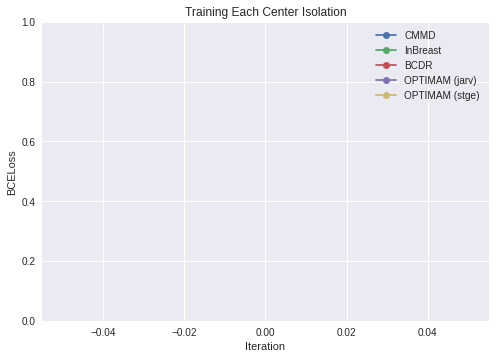

In [12]:
plt.plot(steps, cmmd_losses_local_round1,'-o', label='CMMD')
plt.plot(steps, inbreast_losses_local_round1,'-o', label='InBreast')
plt.plot(steps, bcdr_losses_local_round1,'-o', label='BCDR')
plt.plot(steps, jarv_losses_local_round1,'-o', label='OPTIMAM (jarv)')
plt.plot(steps, stge_losses_local_round1,'-o', label='OPTIMAM (stge)')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0,1)
plt.ylabel('BCELoss')
plt.title('Training Each Center Isolation')
plt.savefig('./plots/sanity_check_success30EPR1FR.png')

In [13]:
cmmd_f1 = [2 * cmmd_metrics['GMLD_true_positives'][i] / (2 * cmmd_metrics['GMLD_true_positives'][i] + cmmd_metrics['GMLD_false_positives'][i] + cmmd_metrics['GMLD_false_negatives'][i]) for i in range(len(cmmd_metrics['GMLD_true_positives']))]


# Sanity check Success!